In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [2]:
# loading mnist dataset from keras
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

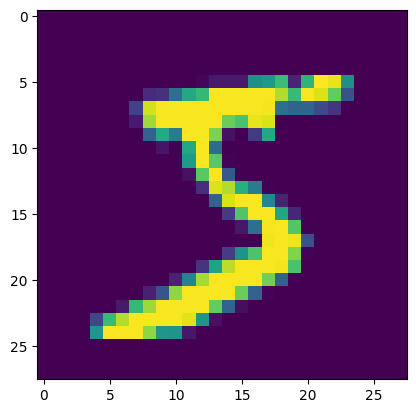

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
# scaling the data using min max scaler
X_train = X_train/255
X_test = X_test/255

In [9]:
# now building our neural network

model = Sequential()
model.add(Input(shape = (28,28)))  #input layer
model.add(Flatten())

model.add(Dense(128,activation = 'relu')) #hidden layer 1
model.add(Dense(32,activation = 'relu')) #hidden layer 2
model.add(Dense(10,activation = 'softmax')) #output layer

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.9181 - val_loss: 0.1472 - val_accuracy: 0.9567
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1214 - accuracy: 0.9635 - val_loss: 0.1180 - val_accuracy: 0.9643
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0981 - val_accuracy: 0.9718
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.1025 - val_accuracy: 0.9713
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0878 - val_accuracy: 0.9760
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.1042 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.0901 - val_accuracy:

In [14]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 2ms/step


In [15]:
y_pred[0]

array([2.19999977e-20, 1.04352995e-17, 9.93525093e-15, 8.85597476e-13,
       8.73890487e-24, 9.19747571e-23, 3.93363471e-23, 1.00000000e+00,
       6.09348538e-23, 6.07526673e-15], dtype=float32)

In [16]:
y_pred = y_pred.argmax(axis = 1)

In [19]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9728

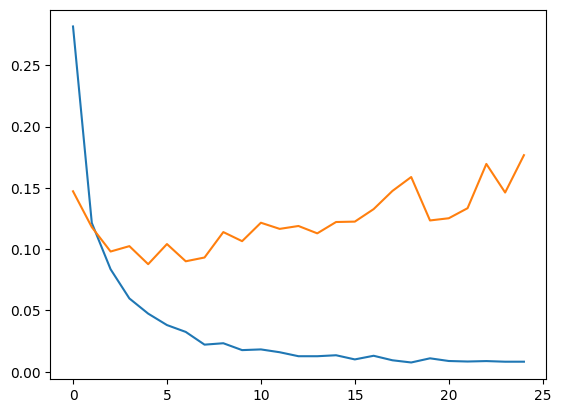

In [20]:
# plotting the history of training

plt.plot(history.history['loss'])  #training loss
plt.plot(history.history['val_loss'])  #validation loss

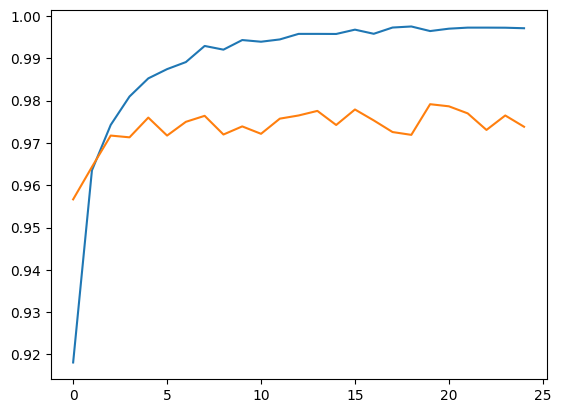

In [21]:
plt.plot(history.history['accuracy'])  # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy